# **Import Library**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import folium

# **Exploratory Data Analysis dan Data Preprocessing**

## Data Tempat wisata semarang

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tempat_wisata = pd.read_csv('drive/My Drive/Data/tourism_with_id.csv')

In [ ]:
data_wisata_semarang = tempat_wisata.loc[tempat_wisata['City'] == 'Semarang']

In [ ]:
wisata_semarang = tempat_wisata.loc[tempat_wisata['City'] == 'Semarang']
wisata_semarang.head(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,NaN,"{'lat': -7.209886700000002, 'lng': 110.3421119}",-7.209887,110.342112,NaN,335
335,336,Grand Maerakaca,Masyarakat Jawa Tengah mungkin sudah tidak asi...,Taman Hiburan,Semarang,15000,4.4,NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960523,110.386394,NaN,336
336,337,Kampung Pelangi,Kampung pelangi atau dalam bahasa Inggris dise...,Taman Hiburan,Semarang,3000,4.3,30.0,"{'lat': -6.988881200000001, 'lng': 110.4083781}",-6.988881,110.408378,NaN,337


In [ ]:
wisata_semarang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 334 to 390
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      57 non-null     int64  
 1   Place_Name    57 non-null     object 
 2   Description   57 non-null     object 
 3   Category      57 non-null     object 
 4   City          57 non-null     object 
 5   Price         57 non-null     int64  
 6   Rating        57 non-null     float64
 7   Time_Minutes  28 non-null     float64
 8   Coordinate    57 non-null     object 
 9   Lat           57 non-null     float64
 10  Long          57 non-null     float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   57 non-null     int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 6.2+ KB


In [ ]:
wisata_semarang.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,57.000000,57.000000,57.000000,28.000000,57.000000,57.000000,0.0,57.000000
mean,363.000000,17017.543860,4.361404,70.357143,-7.100864,110.403734,NaN,363.000000
std,16.598193,34908.293748,0.244770,35.562375,0.133299,0.034778,NaN,16.598193
min,335.000000,0.000000,3.400000,20.000000,-7.395606,110.293713,NaN,335.000000
25%,349.000000,2000.000000,4.200000,45.000000,-7.225504,110.381068,NaN,349.000000
50%,363.000000,5000.000000,4.400000,60.000000,-7.037211,110.408813,NaN,363.000000
75%,377.000000,15000.000000,4.500000,90.000000,-6.983910,110.426451,NaN,377.000000
max,391.000000,200000.000000,4.800000,180.000000,-6.945105,110.486253,NaN,391.000000


## Menghapus Kolom yang tidak penting

In [ ]:
wisata_semarang = wisata_semarang.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Description', 'City', 'Coordinate', 'Long', 'Lat', 'Category'])

In [ ]:
wisata_semarang.head()

,Place_Id,Place_Name,Price,Rating
334,335,Candi Gedong Songo,10000,4.5
335,336,Grand Maerakaca,15000,4.4
336,337,Kampung Pelangi,3000,4.3
337,338,Lawang Sewu,10000,4.6
338,339,Sam Poo Kong Temple,35000,4.5


## Visualisasi sebaran data rating dan price

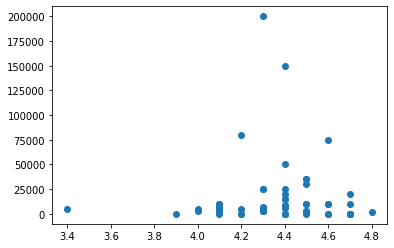

In [ ]:
plt.scatter(wisata_semarang['Rating'], wisata_semarang['Price'])

# **Menentukan Jumlah Klaster (K) menggunakan Elbow Method**

In [ ]:
df = wisata_semarang.loc[:, ['Rating', 'Price']]
df.head(3)

,Rating,Price
334,4.5,10000
335,4.4,15000
336,4.3,3000


In [ ]:
inertia = []
for k in range(1, 7):
    model = KMeans(n_clusters=k, random_state=10)
    model.fit(df)
    inertia.append(model.inertia_)

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 7)])
inertia_df

,Inertia
1,6.824098e+10
2,1.650891e+10
3,6.201382e+09
4,2.773631e+09
5,1.523631e+09
6,9.003765e+08


Text(0.5, 1.0, 'Elbow Method')

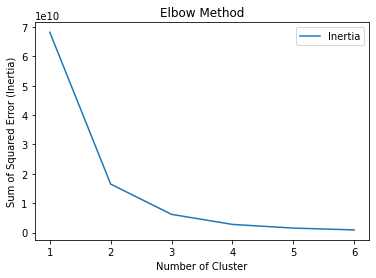

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

#**Modelling** 

In [ ]:
model = KMeans(n_clusters=3, random_state=10, n_init=10, max_iter=350)
model

KMeans(max_iter=350, n_clusters=3, random_state=10)

In [ ]:
y_pred = model.fit_predict(wisata_semarang[['Rating', 'Price']])
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
wisata_semarang['cluster'] = y_pred
wisata_semarang.head()

,Place_Id,Place_Name,Price,Rating,cluster
334,335,Candi Gedong Songo,10000,4.5,0
335,336,Grand Maerakaca,15000,4.4,0
336,337,Kampung Pelangi,3000,4.3,0
337,338,Lawang Sewu,10000,4.6,0
338,339,Sam Poo Kong Temple,35000,4.5,2


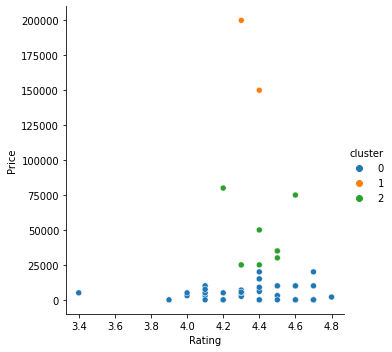

In [ ]:
sns.relplot(x='Rating', y='Price', data=wisata_semarang, hue='cluster', palette='tab10')

# **Normalisasi menggunakan MinMaxScaller**

In [ ]:
wisata_semarang.head()

,Place_Id,Place_Name,Price,Rating,cluster
334,335,Candi Gedong Songo,10000,4.5,0
335,336,Grand Maerakaca,15000,4.4,0
336,337,Kampung Pelangi,3000,4.3,0
337,338,Lawang Sewu,10000,4.6,0
338,339,Sam Poo Kong Temple,35000,4.5,2


In [ ]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(wisata_semarang.drop(['Place_Id', 'Place_Name', 'cluster'], axis=1))

In [ ]:
wisata_semarang = pd.DataFrame(norm, index=wisata_semarang.index, columns=['Price', 'Rating'])
wisata_semarang.head()

,Price,Rating
334,0.050,0.785714
335,0.075,0.714286
336,0.015,0.642857
337,0.050,0.857143
338,0.175,0.785714


# **Modelling setelah normalisasi**

In [ ]:
model = KMeans(n_clusters=3, random_state=10, n_init=10, max_iter=350)
y_pred = model.fit_predict(wisata_semarang[['Rating', 'Price']])
y_pred

array([2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
model.cluster_centers_

array([[0.5327381 , 0.04572917],
       [0.67857143, 0.875     ],
       [0.80645161, 0.06459677]])

In [ ]:
wisata_semarang['cluster'] = y_pred
wisata_semarang.head()

,Price,Rating,cluster
334,0.050,0.785714,2
335,0.075,0.714286,2
336,0.015,0.642857,0
337,0.050,0.857143,2
338,0.175,0.785714,2


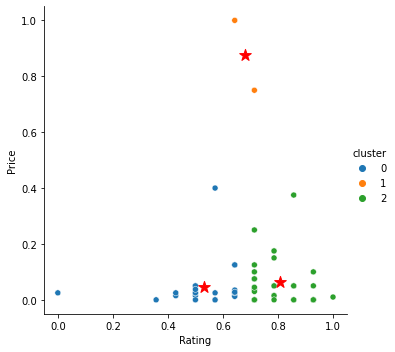

In [ ]:
sns.relplot(x='Rating', y='Price', data=wisata_semarang, hue='cluster', palette='tab10')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
            color='red', marker='*', s=150)

In [ ]:
wisata_semarang_cluster = pd.merge(data_wisata_semarang.drop(['Place_Id', 'Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Description', 'City', 'Coordinate'], axis=1), wisata_semarang.drop(['Price', 'Rating'], axis=1), left_on=data_wisata_semarang.index, right_on=wisata_semarang.index)

In [ ]:
wisata_semarang_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key_0       57 non-null     int64  
 1   Place_Name  57 non-null     object 
 2   Category    57 non-null     object 
 3   Price       57 non-null     int64  
 4   Rating      57 non-null     float64
 5   Lat         57 non-null     float64
 6   Long        57 non-null     float64
 7   cluster     57 non-null     int32  
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 3.8+ KB


# **Evaluasi**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(wisata_semarang, wisata_semarang['cluster'])
calinski_km = calinski_harabasz_score(wisata_semarang, wisata_semarang['cluster'])
dbi_km = davies_bouldin_score(wisata_semarang, wisata_semarang['cluster'])

model_selection=pd.DataFrame({'K Means':[siluet_km, calinski_km, dbi_km]}, 
                              index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

In [ ]:
model_selection

,K Means
Silhouette Score,0.874823
Calinski-Harabasz,1378.002038
Davies-Bouldin,0.186954


# **Visualisasi hasil clustering dalam bentuk map**

In [ ]:
cluster_1 = wisata_semarang_cluster.loc[wisata_semarang_cluster['cluster'] == 0]
cluster_2 = wisata_semarang_cluster.loc[wisata_semarang_cluster['cluster'] == 1]
cluster_3 = wisata_semarang_cluster.loc[wisata_semarang_cluster['cluster'] == 2]

In [ ]:
cluster_1

,key_0,Place_Name,Category,Price,Rating,Lat,Long,cluster
2,336,Kampung Pelangi,Taman Hiburan,3000,4.3,-6.988881,110.408378,0
5,339,Desa Wisata Lembah Kalipancur,Taman Hiburan,0,3.9,-7.020524,110.375461,0
6,340,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,3000,4.3,-7.029684,110.399961,0
8,342,Pantai Baruna,Bahari,3000,4.0,-6.945105,110.398240,0
9,343,Pantai Marina,Bahari,3000,4.1,-6.948877,110.389328,0
14,348,Wisata Mangrove Tapak,Cagar Alam,5000,4.3,-6.968562,110.345970,0
15,349,Pantai Cipta,Bahari,5000,4.0,-6.948640,110.410292,0
22,356,Wisata Alam Wana Wisata Penggaron,Cagar Alam,10000,4.1,-7.115797,110.421797,0
23,357,Masjid Kapal Semarang,Tempat Ibadah,0,4.1,-7.018778,110.293713,0
24,358,Taman Bunga Celosia,Cagar Alam,25000,4.3,-7.225504,110.346317,0


In [ ]:
wisata_cluster_1 = folium.Map(location=[-7.005145, 110.438126], zoom_start=10)
lokasi_wis_1 = folium.map.FeatureGroup()

for lat, lng, in zip(cluster_1.Lat, cluster_1.Long):
    lokasi_wis_1.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
))
latitudes = list(cluster_1.Lat)
longitudes = list(cluster_1.Long)
labels = list(cluster_1.Place_Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat,lng], popup=label, tooltip='Klik untuk mengetahui nama destinasi').add_to(wisata_cluster_1)    
wisata_cluster_1.add_child(lokasi_wis_1)

In [ ]:
cluster_2

,key_0,Place_Name,Category,Price,Rating,Lat,Long,cluster
21,355,Saloka Theme Park,Taman Hiburan,150000,4.4,-7.280726,110.459554,1
47,381,Kampoeng Kopi Banaran,Taman Hiburan,200000,4.3,-7.253901,110.441495,1


In [ ]:
wisata_cluster_2 = folium.Map(location=[-7.005145, 110.438126], zoom_start=10)
lokasi_wis_2 = folium.map.FeatureGroup()

for lat, lng, in zip(cluster_2.Lat, cluster_2.Long):
    lokasi_wis_2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
))
latitudes = list(cluster_2.Lat)
longitudes = list(cluster_2.Long)
labels = list(cluster_2.Place_Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat,lng], popup=label, tooltip='Klik untuk mengetahui nama destinasi').add_to(wisata_cluster_2)    
wisata_cluster_2.add_child(lokasi_wis_2)

In [ ]:
cluster_3

,key_0,Place_Name,Category,Price,Rating,Lat,Long,cluster
0,334,Candi Gedong Songo,Budaya,10000,4.5,-7.209887,110.342112,2
1,335,Grand Maerakaca,Taman Hiburan,15000,4.4,-6.960523,110.386394,2
3,337,Lawang Sewu,Budaya,10000,4.6,-6.983910,110.410434,2
4,338,Sam Poo Kong Temple,Budaya,35000,4.5,-6.996237,110.398122,2
7,341,Taman Kasmaran,Taman Hiburan,3000,4.5,-6.990940,110.406593,2
10,344,Kampoeng Djadhoel Semarang,Budaya,10000,4.7,-6.968773,110.431950,2
11,345,Indonesia Kaya Park,Taman Hiburan,0,4.6,-6.992351,110.420116,2
12,346,Taman Pandanaran,Taman Hiburan,0,4.4,-6.987794,110.417226,2
13,347,Pura Giri Natha,Budaya,20000,4.7,-6.998476,110.410647,2
16,350,Old City 3D Trick Art Museum,Budaya,50000,4.4,-6.968406,110.426200,2


In [ ]:
wisata_cluster_3 = folium.Map(location=[-7.005145, 110.438126], zoom_start=10)
lokasi_wis_3 = folium.map.FeatureGroup()

for lat, lng, in zip(cluster_3.Lat, cluster_3.Long):
    lokasi_wis_3.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
))
latitudes = list(cluster_3.Lat)
longitudes = list(cluster_3.Long)
labels = list(cluster_3.Place_Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat,lng], popup=label, tooltip='Klik untuk mengetahui nama destinasi').add_to(wisata_cluster_3)    
wisata_cluster_3.add_child(lokasi_wis_3)